# 1. Régression linéaire simple


### 1) Installez la bibliothèque sklearn


In [73]:
# Import des librairies utilisées
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import *
from random import randrange, seed
import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

### 2) Créez un notebook pour lire la base de données «Boston housing dataset » et générez un dataframe.


In [4]:
boston = load_boston()
df = pd.DataFrame(boston.data,columns=boston.feature_names)
# Ajout de la variable dépendante MEDV
df['MEDV'] = boston.target

C:\Users\basti\miniconda3\envs\isd\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

### 3) Se familiariser avec la base de données (p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes). Générez un histogramme de la distribution de la variable dépendante.

In [5]:
# Overview du dataframe
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Description des acronymes:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10.000 dollars
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [6]:
# Aperçu des colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
# Valeur manquantes
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Pas de valeurs manquantes

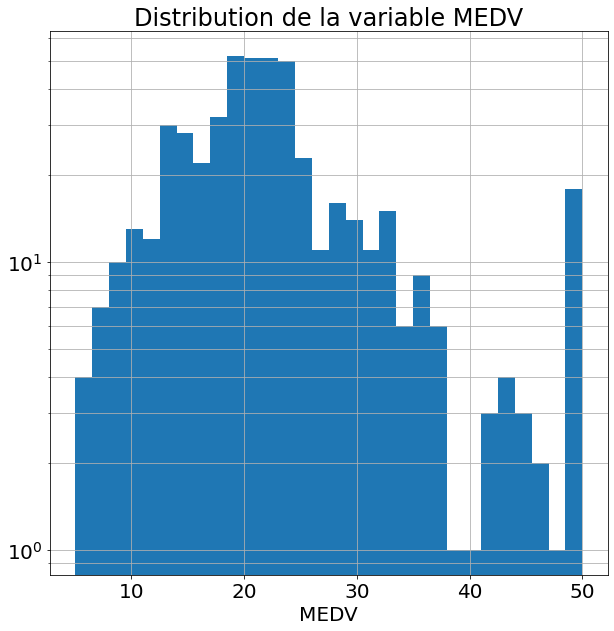

In [8]:
# Histogramme variable MEDV
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 20})
plt.grid(True, which="both")
plt.xlabel("MEDV")
plt.title("Distribution de la variable MEDV")
_ = plt.hist(df['MEDV'], bins=30, log=1)

### 4) Visualiser des boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE. Commentez vos observations.

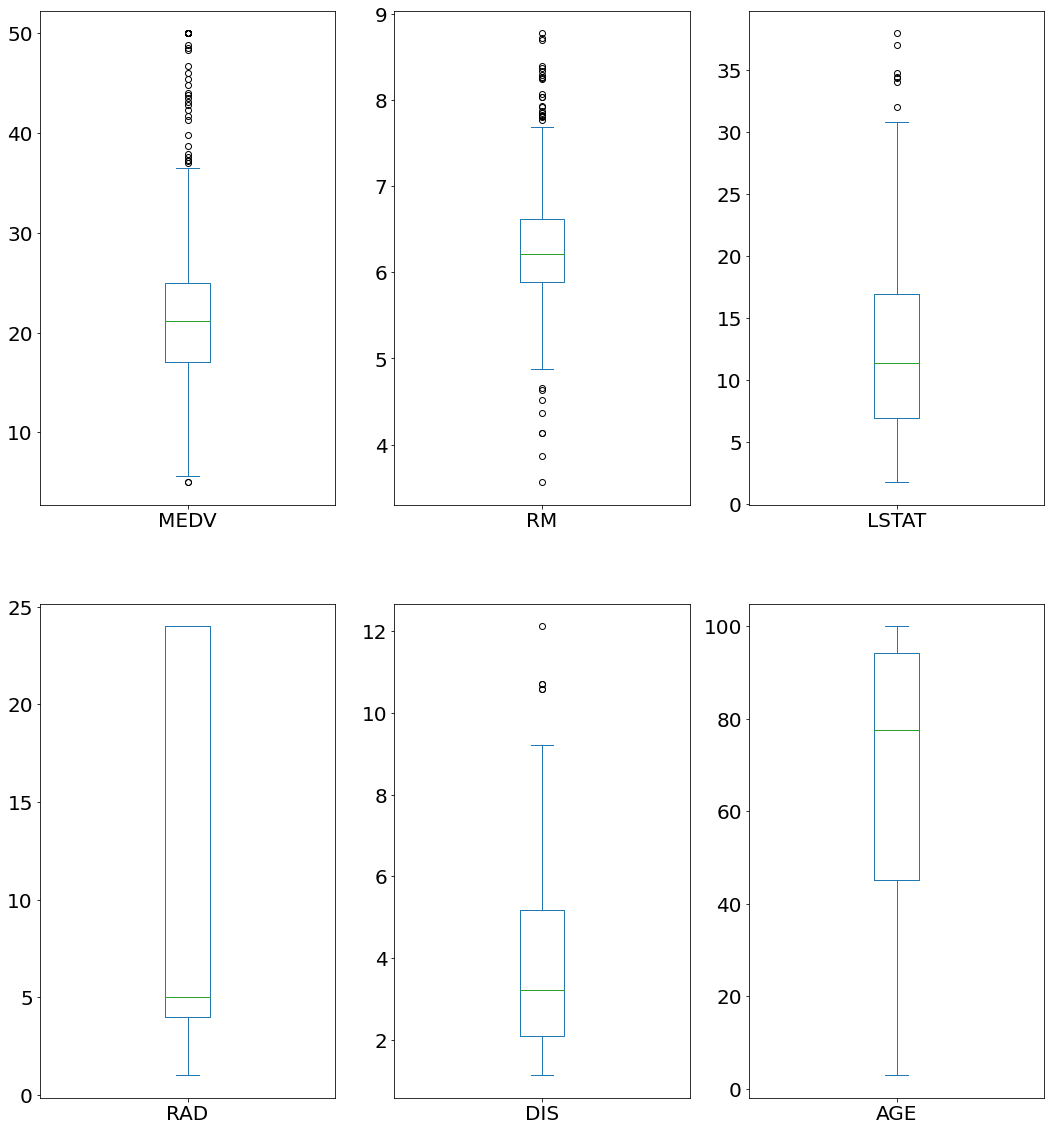

In [9]:
# Analyse des boxplots
fig = df[['MEDV', 'RM', 'LSTAT', 'RAD', 'DIS', 'AGE']].plot(kind='box',  subplots=True, layout=(2,3), figsize = (18,20))

Conclusion :
- On voit que les variables AGE et RAD sont très distribué (grande boîte) tandis que les autres variables ont moins tendance à varier

### 5) Créez des modèles en utilisant l’algorithme de régression linéaire simple vue en cours pour estimer la valeur MEDV à partir des variables RM, RAD et LSTAT, chaque fois utilisant seulement une des variables. Programmez les fonctions pour faire une validation hold-out (e.g., 80% train + 20% test x 100 fois) et pour calculer le coefficient de détermination afin d’évaluer la performance moyenne du modèle. Commentez vos résultats.

#### 5.1) Création fonction de regression linéaire

In [10]:
# Descente de gradient pas-à-pas
# Selon algorithme page 31 des slides 9.ISD_RegressionLineaire

def compute_MSE(b,m,data):
    totalError = 0 # Mean square error formula
    
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
        totalError += (y-(m*x + b)) ** 2 # Somme des différences au carré
        
    return totalError/ float(len(data)) # On divise par N

def step_gradient(b_current, m_current, data, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))
        
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
    b = starting_b
    m = starting_m
    
    for i in range(num_epochs):
        b, m = step_gradient(b, m, np.array(data), learning_rate)
        #print("After {0} epochs b = {1}, m = {2}, error = {3}".format(i, b, m, compute_MSE(b, m, data)))
        
    return [b, m]

In [11]:
# Fonction de split pour la validation hold-out

def train_test_split(dataset, split=0.80):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
        
    return train, dataset_copy

#### 5.2) Test de l'algorithme

In [49]:
# Teste de l'algorithme avec la variable RM
# Etape 1 collecter les données
scaler = StandardScaler()
data = scaler.fit_transform(np.array(df[['RM', 'MEDV']]))

# Etape 2 on choisit les hyperparamètres
learning_rate = 0.0001
num_epochs = 500

# Etape 3: On initialise la valeur de m etde b
initial_b = np.random.rand(1)
initial_m = np.random.rand(1)

# Etape 4: On applique la méthode decente du gradient descendant
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, 
compute_MSE(initial_b, initial_m, data)))
print("Running...")
[b, m] = gradient_descent(data, initial_b, initial_m, learning_rate, num_epochs)
print("After {0} epochs b = {1}, m = {2}, error = {3}".format(num_epochs, b, m, compute_MSE(b, m, data)))

Starting gradient descent at b = [0.91121064], m = [0.53537049], error = [1.37237599]
Running...
After 500 epochs b = [0.8667682], m = [0.54317365], error = [1.29092233]


In [16]:
# Fonction qui utilise la fonction de reg linéaire de sklearn
def sklearn_regression(x_attribut, y_attribut):
    lr = LinearRegression()
    
    x_attribut = x_attribut.reshape(-1,1)
    y_attribut = y_attribut.reshape(-1,1)
    
    lr.fit(x_attribut, y_attribut)
    return lr.predict(x_attribut)

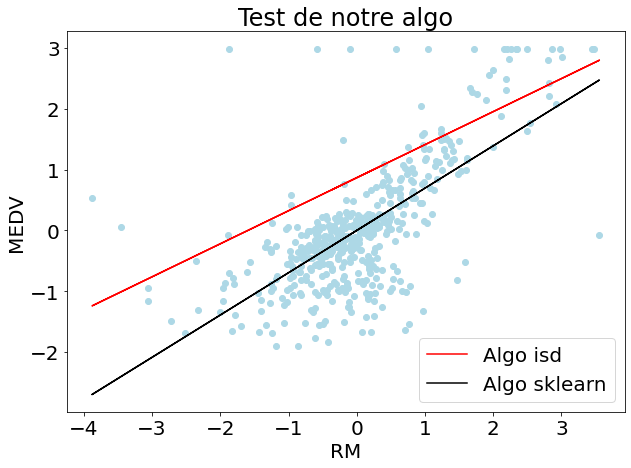

In [50]:
# Plot du graph
plt.figure(figsize=(10,7))
x_axis, y_axis = data[:,0], data[:,1]

# Scatter des deux vriables RM et MEDV
plt.scatter(x_axis, y_axis,color = 'lightblue')

# Droite de régression de notre algo
plt.plot(x_axis, m * x_axis + b, 'red', label= "Algo isd")

# Droite de régression sklearn
plt.plot(x_axis, sklearn_regression(x_axis, y_axis), 'black', label= "Algo sklearn")

plt.legend()
plt.xlabel("RM")
plt.ylabel("MEDV")
_= plt.title("Test de notre algo")

Cette partie est un simple test pour m'assurer de la fonctionnalité de l'algo il n'est donc pas à prendre en compte. Cependant on peut voir que l'inclinaison de la courbe est proche de celle de l'algo proposé par sklearn on pourra sûrement améliorer la précision en changeant les hyperparamètres.

#### 5.3) Création des fonction regression avec hold-out et affichage d'un graph

In [55]:
# Fonction regression linéaire avec validation hold-out
def regression_HO(lrng_rate, n_epochs, n_time, split, dataset):
    coef_list = []
    best_it = 0
    dataset = scaler.fit_transform(np.array(dataset))
    
    for i in range(n_time):
        train, test = train_test_split(dataset)
        
        initial_b = np.random.rand(1)
        initial_m = np.random.rand(1)
        
        #print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, 
        #compute_MSE(initial_b, initial_m, np.array(train))))
        b, m = gradient_descent(np.array(train), initial_b, initial_m, lrng_rate, n_epochs)
        coef_list.append(sklearn.metrics.r2_score(np.array(test)[:,1], m * np.array(test)[:,0] + b))
        #print(b, m, coef_list[i])
        
        if (coef_list[i] >= coef_list[best_it]):
            best_it = i
            best_b, best_m, best_r2 = b, m, coef_list[i]
            
    avg_r2 = sum(coef_list) / n_time
    
    print("Best regression b = {0}, m = {1} and R2_score = {2}\n".format(best_b, best_m, best_r2))
    print("Average regression R2_score = {0}\n".format(avg_r2))
    
    return best_b, best_m, best_r2, avg_r2

In [62]:
# Fonction affichage résultat
def affichage_plot(attribut, var_dep, title, best_b, best_m, best_r2, avg_r2):
    # PLot du graph
    plt.figure(figsize=(10,7))
    x_axis, y_axis = scaler.fit_transform(np.array(df[[attribut]])), scaler.fit_transform(np.array(df[[var_dep]]))
    y_sklearn_predict = sklearn_regression(x_axis, y_axis)

    # Scatter des deux vriables RM et MEDV
    plt.scatter(x_axis, y_axis,color = 'lightblue')

    # Droite de régression de notre algo
    plt.plot(x_axis, best_m * x_axis + best_b, 'red', label= "Algo isd meilleure courbe")

    # Droite de régression sklearn
    plt.plot(x_axis, y_sklearn_predict, 'black', label= "Algo sklearn")

    plt.legend(loc = "lower right", fontsize = 10)
    plt.xlabel(attribut)
    plt.ylabel(var_dep)
    plt.title(title)
    
    print("R2_score:\nMeilleure : {0}\nMoyen : {1}\nSklearn : {2}".format(best_r2, avg_r2, sklearn.metrics.r2_score(y_axis, y_sklearn_predict)))

#### 5.4) Regression des 3 variables (RM, RAD, LSTAT) avec résultats

In [64]:
# Regression RM over MEDV
best_b, best_m, best_r2, avg_r2 = regression_HO(0.001, 200, 100, 0.80, df[['RM', 'MEDV']])

Best regression b = [0.03946865], m = [0.84892354] and R2_score = 0.640929676367007

Average regression R2_score = 0.1932338322575451



R2_score:
Meilleure : 0.640929676367007
Moyen : 0.1932338322575451
Sklearn : 0.483525455991334


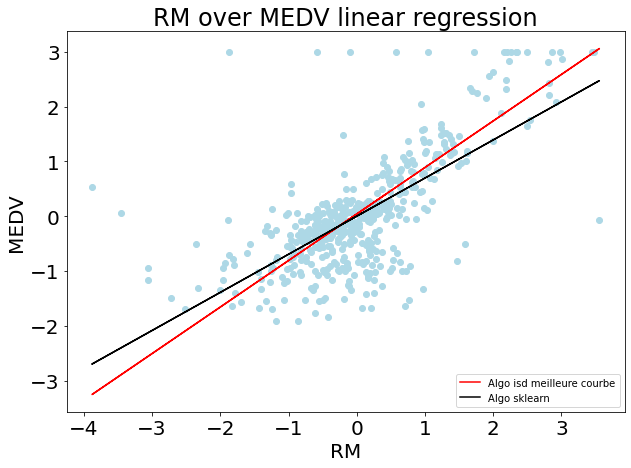

In [66]:
# Plot du graph
affichage_plot('RM', 'MEDV', "RM over MEDV linear regression", best_b, best_m, best_r2, avg_r2)

In [67]:
# Regression RAD over MEDV
best_b, best_m, best_r2, avg_r2 = regression_HO(0.001, 200, 100, 0.80, df[['RAD', 'MEDV']])

Best regression b = [0.02542954], m = [-0.03729358] and R2_score = 0.034647416878925696

Average regression R2_score = -0.7217990608678475



R2_score:
Meilleure : 0.034647416878925696
Moyen : -0.7217990608678475
Sklearn : 0.14563857991232487


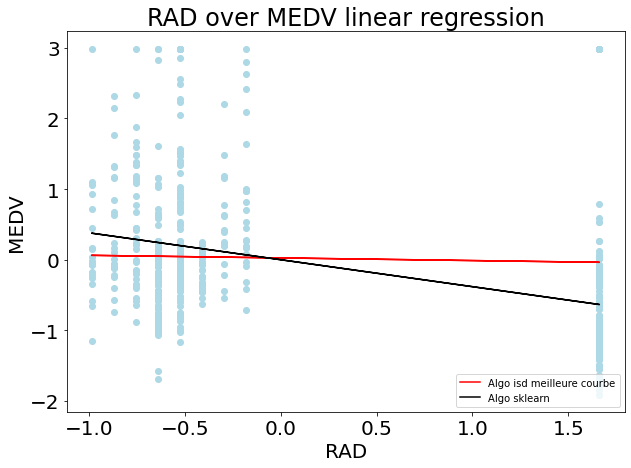

In [68]:
# Plot du graph
affichage_plot('RAD', 'MEDV', "RAD over MEDV linear regression", best_b, best_m, best_r2, avg_r2)

In [69]:
# Regression LSTAT over MEDV
best_b, best_m, best_r2, avg_r2 = regression_HO(0.001, 200, 100, 0.80, df[['LSTAT', 'MEDV']])

Best regression b = [0.09649364], m = [-0.10556276] and R2_score = 0.13286190169932133

Average regression R2_score = -0.8134287542463179



R2_score:
Meilleure : 0.13286190169932133
Moyen : -0.8134287542463179
Sklearn : 0.5441462975864797


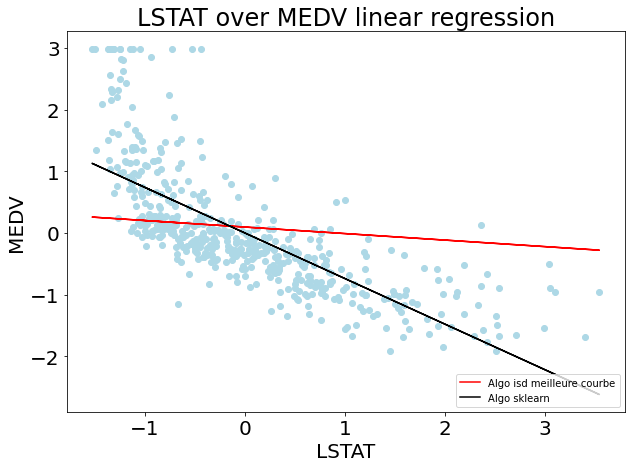

In [70]:
# Plot du graph
affichage_plot('LSTAT', 'MEDV', "LSTAT over MEDV linear regression", best_b, best_m, best_r2, avg_r2)

### 6) Explorez les hyper-paramètres : learning_rate et nombre d’epochs d’entraînement. Calculez la performance moyenne (c.a.d., la moyenne de x100 fois le coefficient de détermination calculé sur le test set) du meilleur modèle trouvé par validation hold-out. Indiquez la valeur des hyper-paramètres qui donnent les meilleurs résultats et la meilleure performance trouvée. Générez un scatter-plot affichant les données (variable indépendante, variable dépendante) 

In [71]:
# Liste des hyperparamètres
learning_rate = [0.1, 0.01, 0.001, 0.0001]
n_epochs = [5, 50, 200, 500]

Best regression b = [-0.02036021], m = [0.65971657] and R2_score = 0.7046650924998779

Average regression R2_score = 0.4488352281137902

R2_score:
Meilleure : 0.7046650924998779
Moyen : 0.4488352281137902
Sklearn : 0.483525455991334
Learning rate : 0.1
N_epochs : 500
Best regression b = [-0.01612301], m = [0.66677055] and R2_score = 0.727567730764328

Average regression R2_score = 0.46267996104143577

R2_score:
Meilleure : 0.727567730764328
Moyen : 0.46267996104143577
Sklearn : 0.483525455991334
Learning rate : 0.01
N_epochs : 500
Best regression b = [-0.00455455], m = [0.68186408] and R2_score = 0.6537968915276918

Average regression R2_score = 0.2965315315814256

R2_score:
Meilleure : 0.6537968915276918
Moyen : 0.2965315315814256
Sklearn : 0.483525455991334
Learning rate : 0.001
N_epochs : 500
Best regression b = [0.31922092], m = [0.67202813] and R2_score = 0.5521693387734776

Average regression R2_score = -0.00959687403744341

R2_score:
Meilleure : 0.5521693387734776
Moyen : -0.009

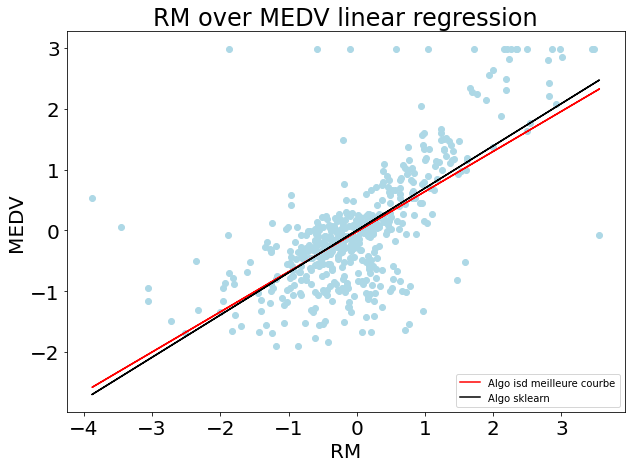

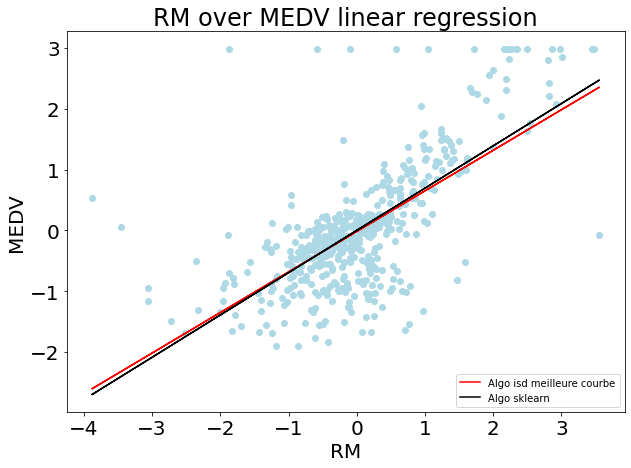

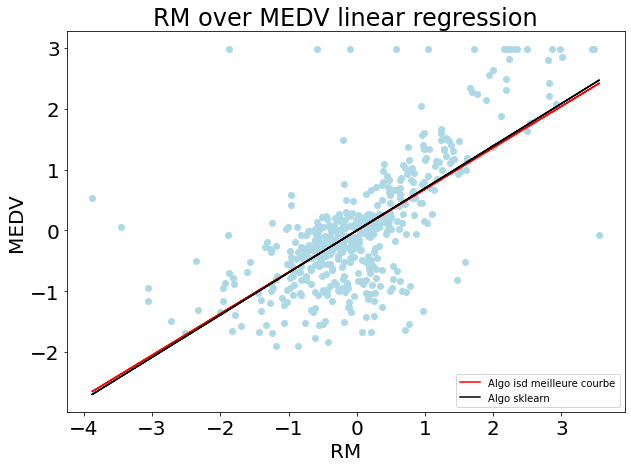

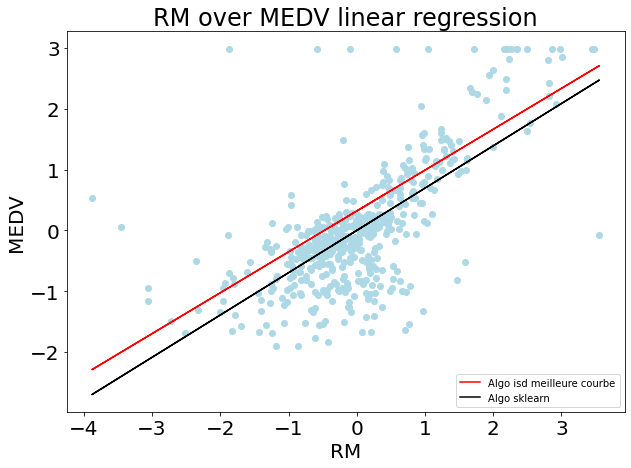

In [74]:
# Exploration de l'hyperparamètre learning_rate pour la variable RM
for i in learning_rate:
    best_b, best_m, best_r2, avg_r2 = regression_HO(i, n_epochs[-1], 100, 0.80, df[['RM', 'MEDV']])
    affichage_plot('RM', 'MEDV', "RM over MEDV linear regression", best_b, best_m, best_r2, avg_r2)
    print("Learning rate : {0}\nN_epochs : {1}".format(i, n_epochs[-1]))

In [ ]:
# Exploration de l'hyperparamètre n_epochs pour la variable RM
for i in n_epochs:
    best_b, best_m, best_r2, avg_r2 = regression_HO(learning_rate, n_epochs[-1], 100, 0.80, df[['RM', 'MEDV']])
    affichage_plot('RM', 'MEDV', "RM over MEDV linear regression", best_b, best_m, best_r2, avg_r2)
    print("Learning rate : {0}\nN_epochs : {1}".format(i, n_epochs[-1]))